<a href="https://colab.research.google.com/github/HenriqueCrj/AulasPython/blob/master/Henrique_Aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



    1. Resolução numérica de equações diferenciais. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

    2. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

    3. Considere um péndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.

    4. (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

    Dica: podem usar o pacote matplotlib.pyplot para fazer um gráfico:


In [1]:
#Questão 1
import numpy as np

def muv(s_0,s_f,t_0,v,delta_t=1):
    """Cria uma lista com distâncias percorridas em certos intervalos. A equação usada é s_f = v*(t - t_0) + s_0.
    Args:
        s_i: posição inicial
        s_f: posição final
        t_0: tempo inicial
        v: velocidade do objeto
        delta_t: intervalo de tempo

    Returns:
        2D_array no qual a primeira linha contém os valores de tempo e a segunda linha os valores de distância
    """
    distances = []
    t_max = (s_f - s_0)/v
    ts = np.arange(t_0,t_max + delta_t,delta_t)
    for t in ts:
        distances.append(v*(t - t_0) + s_0)
    return np.array([ts,distances])

distances = muv(s_0 = 0, s_f = 5, t_0 = 0, v = 12/60, delta_t = 1)
for value in distances[1]:
    print(f"{value:.3f}")

0.000
0.200
0.400
0.600
0.800
1.000
1.200
1.400
1.600
1.800
2.000
2.200
2.400
2.600
2.800
3.000
3.200
3.400
3.600
3.800
4.000
4.200
4.400
4.600
4.800
5.000


Tempo para chegar em 7 km: 672.000 s


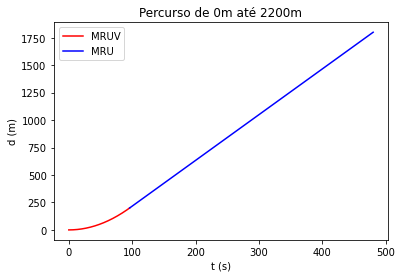

In [2]:
#Questão 2 (Rodar código da questão 1 antes)
import numpy as np
import matplotlib.pyplot as plt

def mruv(v_0,v_f,t_0,d,delta_t=0.1):
    """Cria uma lista com distâncias percorridas em certos intervalos. A equação usada é s_f = s_0 + v_0*t + (a*t**2)/2.
    Args:
        v_i: velocidade inicial
        v_f: velocidade final
        t_0: tempo inicial
        d: distância total
        delta_t: intervalo de tempo

    Returns:
        2D_array no qual a primeira linha contém os valores de tempo e a segunda linha os valores de distância 
    """
    distances = []
    a = (v_f**2 - v_0**2)/(2*d)
    t_max = (v_f - v_0)/a
    ts = np.arange(t_0,t_max + delta_t,delta_t)
    for t in ts:
        distances.append(v_0*(t - t_0) + a*(t - t_0)*(t - t_0)/2)
    return np.array([ts,distances])

path = mruv(v_0 = 0,v_f = 15/3.6, t_0 = 0, d = 200, delta_t=0.1) #Primeira parte do caminho
path2 = muv(s_0 = path[1][-1], s_f = 2200, t_0 = path[0][-1], v= 15/3.6,delta_t=0.1) #Segunda parte do caminho
plt.plot(path[0],path[1],color="red",label="MRUV")
plt.plot(path2[0],path2[1],color="blue",label="MRU")
plt.title("Percurso de 0m até 2200m")
plt.xlabel("t (s)")
plt.ylabel("d (m)")
plt.legend()
path3 = muv(s_0 = path2[1][-1], s_f = 7000, t_0 = path[0][-1], v= 15/3.6,delta_t=0.1) #Caminho de 2200 m até 7000 m
print(f"Tempo para chegar em 7 km: {(path[0][-1] + path2[0][-1] + path[0][-1]):.3f} s")


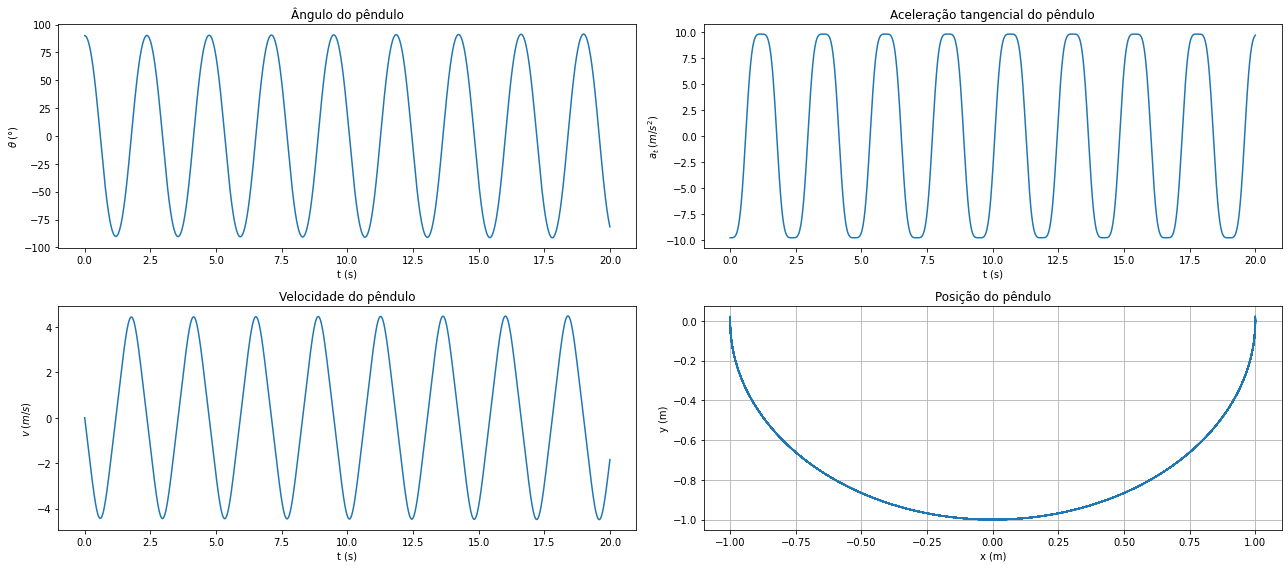

In [3]:
#Questão 3
import numpy as np
import matplotlib.pyplot as plt

def full_simple_pendulum(theta_0=np.pi/4,omega_0=0,t_max=10,delta_t=0.001,g=9.81,m=0.2,l=1):
    """Simulação do pêndulo simples sem fazer aproximação para pequenos ângulos.
    Aproximações de theta e omega feitas pelas retas tangentes. Alpha não precisa pois possui uma equação definida: alfa = -g*sen(theta)/l.

    Args:
        theta_0: ângulo inicial
        omega_0: velocidade ângular inicial
        t_max: tempo máximo da simulação
        delta_t: intervalo de tempo
        g: gravidade local
        m: massa do pêndulo (não precisa)
        l: comprimento do pêndulo
    """
    
    t = np.arange(0,t_max,delta_t)
    theta = np.zeros(t.shape[0])
    omega = np.zeros(t.shape[0])
    alpha = np.zeros(t.shape[0])
    theta[0] = theta_0 #Valores iniciais
    omega[0] = omega_0
    alpha[0] = (-g*np.sin(theta_0))/l
    for i in range(0,len(t) - 1):
        theta[i+1] = omega[i]*delta_t + theta[i]
        alpha[i+1] = (-g*np.sin(theta[i]))/l
        omega[i+1] = alpha[i]*delta_t + omega[i]

    fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,8))
    ax1.set_title("Ângulo do pêndulo")
    ax1.set_xlabel("t (s)")
    ax1.set_ylabel(r"$\theta \; (°)$")
    ax1.plot(t,theta*180/np.pi)
    ax2.set_title("Aceleração tangencial do pêndulo")
    ax2.set_xlabel("t (s)")
    ax2.set_ylabel(r"$a_t \; (m/s^2)$")
    ax2.plot(t,alpha*l)
    ax3.set_title("Velocidade do pêndulo")
    ax3.set_xlabel("t (s)")
    ax3.set_ylabel(r"$v \; (m/s)$")
    ax3.plot(t,omega*l)
    ax4.set_title("Posição do pêndulo")
    ax4.set_xlabel("x (m)")
    ax4.set_ylabel("y (m)")
    ax4.grid(True)
    ax4.plot(l*np.sin(theta),-l*np.cos(theta))
    plt.tight_layout()

full_simple_pendulum(theta_0 = np.pi/2, omega_0 = 0, t_max = 20.0, delta_t = 0.0001, g=9.81, m=0.2, l=1)